In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import math 
import numpy as np
import random

In [11]:
from nanaograd.engine import Value
from nanaograd.nn.nn import Neuron, Layer, MLP

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(random_state=42, noise=0.1, n_samples=100)

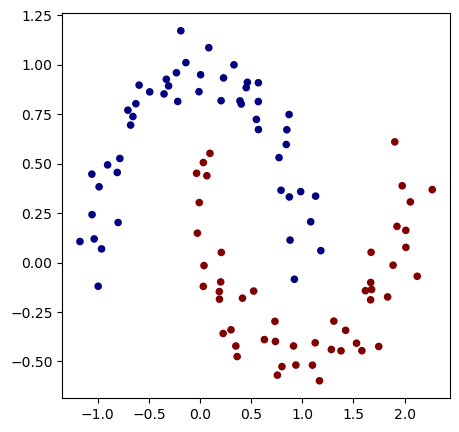

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [24]:
epocs = 100
alpha = 15e-2

In [25]:
model = MLP(2,[16,16,1])
print(model)

sz[2, 16, 16, 1]
[number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2, number of weights: 2]
[number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16, number of weights: 16]
[number of weights: 16]


In [26]:
from nanaograd.nn.losses import MSELoss

loss_fn = MSELoss()

In [27]:
from nanaograd.nn.optimizers.SGD import SGD

optimizer = SGD(model.parameters(), lr=alpha, momentum=0.9)

In [28]:
for i in range(epocs+1):
    # fowrard
    ypred = [model(x.tolist()) for x in X]
    loss = loss_fn(y,ypred)
    rid_loss = sum((p*p for p in model.parameters()))
    total_loss = loss + rid_loss

    #backward
    optimizer.zero_grad()
    total_loss.backward()

    optimizer.step()

    if i % 10 == 0:
        print (f'iteration: {i}, loss: {loss.data}')

    

iteration: 0, loss: 0.5338693494957633
iteration: 10, loss: 0.3158802379416978
iteration: 20, loss: 0.219294208881333
iteration: 30, loss: 0.40782711946356565
iteration: 40, loss: 0.2545441430752539
iteration: 50, loss: 0.42343506831295374
iteration: 60, loss: 0.2693743163934092
iteration: 70, loss: 0.3360899344819616
iteration: 80, loss: 0.31388922452264606
iteration: 90, loss: 0.3114686678143889
iteration: 100, loss: 0.32463644341639275
